# Using Gapminder Data to Examine Survival for Children

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import altair as alt


%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


## Survival of Children in 1985

In [5]:
gdata = gapminder.query('year == 1985')

In [26]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
    
def snsplot():
    sns.scatterplot(x=gdata.age5_surviving, y=gdata.babies_per_woman, hue=gdata.region, size=gdata.population)
    

50           coral
131           gold
212        skyblue
293        skyblue
374      palegreen
           ...    
14385    palegreen
14466        coral
14547        coral
14628      skyblue
14709      skyblue
Name: region, Length: 182, dtype: object

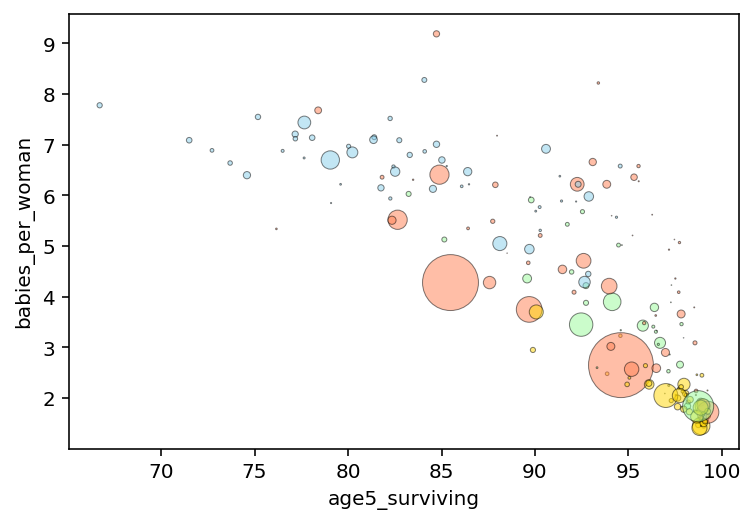

In [25]:
plotdata()

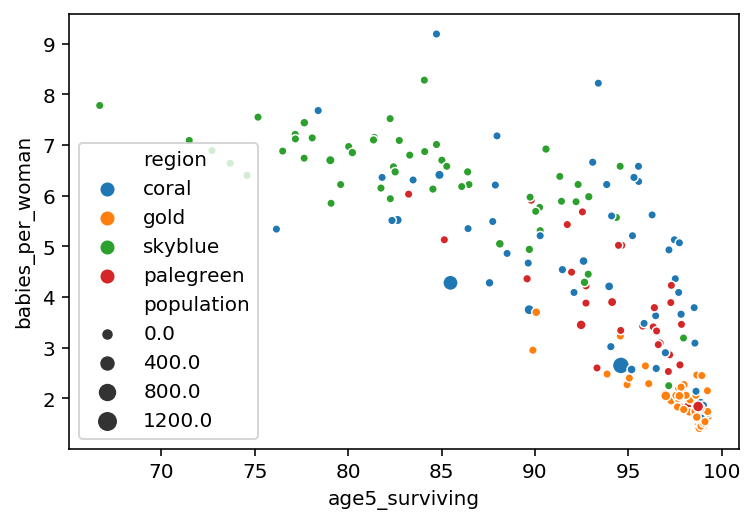

In [23]:
snsplot()

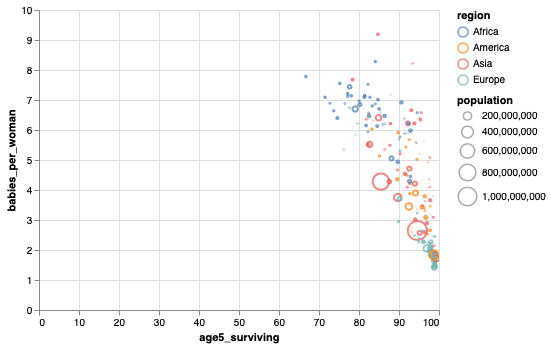

In [15]:
alt.Chart(gdata).mark_point().encode(
    x='age5_surviving', y='babies_per_woman', color='region', size='population', tooltip=['country']).interactive()

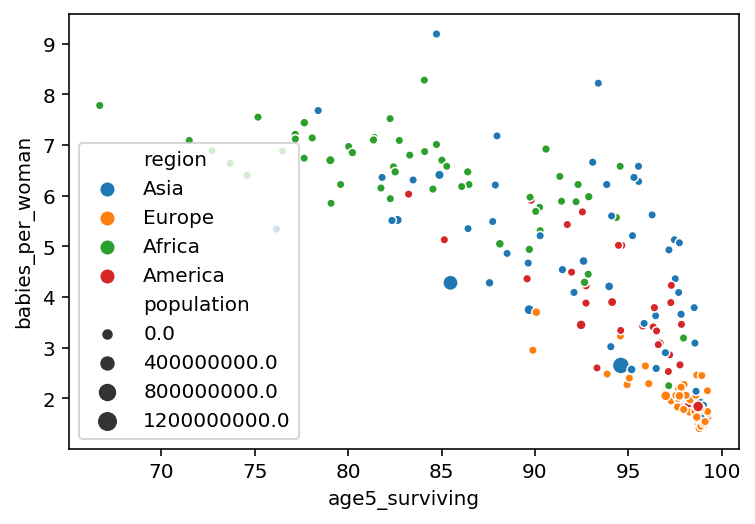

In [18]:
sns.scatterplot(data=gdata,x='age5_surviving', y='babies_per_woman', hue='region', size='population')